<div style="line-height:1.2;">

<h1 style="color:#0FA345; margin-bottom: 0.2em;">Support Vector Machines for Classification 0</h1>
<h4 style="margin-top: 0.2em; margin-bottom: 0.5em;">1 Example with sklearn SVC.</h4>

</div>

<div style="line-height:1.4; margin-top: 0.2em;">
<span>
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3>
    pandas apply(lambda) + pandas select_dtypes() + LabelEncoder + numpy meshgrid + pandas columns.get_loc()
</span>
</div>


In [37]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
#%%script echo Skipping, Colab not in use
from google.colab import files
uploaded = files.upload()

Saving cancer_data.csv to cancer_data (1).csv


In [4]:
#%%script echo Skipping, Colab not in use
if "cancer_data.csv" in uploaded:
    datafram = pd.read_csv("cancer_data.csv")
elif "cancer_data (1).csv" in uploaded:
    datafram = pd.read_csv("cancer_data (1).csv")
else:
    print("File not uploaded.")

In [5]:
%%script echo Skip when Colab in use, comment otherwise
# Read csv file and extracting class column to y.
datafram = pd.read_csv("./cancer_data.csv", header=0)


Skip when Colab in use, comment otherwise


In [6]:
datafram.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
datafram.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# Find categorical columns
categorical_columns = datafram.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['diagnosis'], dtype='object')

#### => LabelEncoder

In [9]:
""" Transform categorical data to integer with LabelEncoder. """
label_encoder = LabelEncoder()
# Indicate columns with categorical data
columns_to_encode = ['diagnosis']
df_ok = datafram.copy()

# Encode the selected columns
df_ok[columns_to_encode] = df_ok[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))
df_ok.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
columns_with_nan = df_ok.columns[df_ok.isna().any()]
columns_with_nan

Index(['Unnamed: 32'], dtype='object')

In [11]:
df_ok = df_ok.drop('Unnamed: 32', axis=1)
df_ok.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X = np.array(df_ok)
X

array([[8.4230200e+05, 1.0000000e+00, 1.7990000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 1.0000000e+00, 2.0570000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.0000000e+00, 1.9690000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.0000000e+00, 1.6600000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 1.0000000e+00, 2.0600000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 0.0000000e+00, 7.7600000e+00, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [13]:
# Slice all lines + last column
y  = X[:, 1]
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [14]:
columns_X = X[0].tolist()
columns_X

[842302.0,
 1.0,
 17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419,
 0.07871,
 1.095,
 0.9053,
 8.589,
 153.4,
 0.006399,
 0.04904,
 0.05373,
 0.01587,
 0.03003,
 0.006193,
 25.38,
 17.33,
 184.6,
 2019.0,
 0.1622,
 0.6656,
 0.7119,
 0.2654,
 0.4601,
 0.1189]

In [15]:
## Extract two features 1
radius_index = datafram.columns.get_loc('radius_mean')
concav_index = datafram.columns.get_loc('concavity_worst')

X_new = X[:, [radius_index, concav_index]]

X_new.shape

(569, 2)

In [16]:
X_new[:10]

array([[17.99  ,  0.7119],
       [20.57  ,  0.2416],
       [19.69  ,  0.4504],
       [11.42  ,  0.6869],
       [20.29  ,  0.4   ],
       [12.45  ,  0.5355],
       [18.25  ,  0.3784],
       [13.71  ,  0.2678],
       [13.    ,  0.539 ],
       [12.46  ,  1.105 ]])

In [17]:
## Extract two features 2
x = np.column_stack((X_new[0], X_new[1]))
# 569 samples and 2 features
x.shape
x

array([[17.99  , 20.57  ],
       [ 0.7119,  0.2416]])

In [18]:
len(X)

569

In [19]:
""" Reduce dataset to avoid endless training """
rows_to_remove = int(0.98 * len(df_ok))
rows_to_remove_indices = random.sample(range(len(df_ok)), rows_to_remove)

filtered_df = df_ok.drop(rows_to_remove_indices)
#filtered_df = df_ok

In [20]:
y_to_use = filtered_df['diagnosis']
y_to_use.head()

98     0
99     1
113    0
149    0
189    0
Name: diagnosis, dtype: int64

In [21]:
X_ok = filtered_df
X_to_use = X_ok.drop(columns=['diagnosis'])
X_to_use.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
98,862485,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.14310,0.1851,0.1922,0.08449,0.2772,0.08756
99,862548,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,...,16.33,30.86,109.50,826.4,0.14310,0.3026,0.3194,0.15650,0.2718,0.09353
113,864292,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,...,11.16,22.75,72.62,374.4,0.13000,0.2049,0.1295,0.06136,0.2383,0.09026
149,869931,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
189,874839,12.30,15.90,78.83,463.7,0.08080,0.07253,0.03844,0.01654,0.1667,...,13.35,19.59,86.65,546.7,0.10960,0.1650,0.1423,0.04815,0.2482,0.06306


In [22]:
len(X_to_use), len(y_to_use)

(12, 12)

In [23]:
# Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_to_use, y_to_use, test_size=0.2, random_state=42)

In [24]:
len(X_train), len(y_train)

(9, 9)

<h3 style="color:#0FA345 "> Recap: Available kernels </h3>
<div style="margin-top: -8px;">

- linear
- poly
- rbf
- sigmoid
- precomputed
</div>

In [25]:
""" Support Vector Classifier.
N.B.
Difficult to converge when based on linear kernel !
"""
clf = SVC(kernel='rbf')

# Fit x samples and y classes
clf.fit(X_train, y_train);

In [26]:
# Predict on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.67
Confusion Matrix:
[[2 0]
 [1 0]]


In [77]:
def plot_decision_boundary(clf, X, y):
    # Convert DataFrame X and Series y to NumPy arrays
    X = X.to_numpy()
    y = y.to_numpy()
    # Define the step size for the meshgrid
    h = .01

    # Determine the x-axis range (min and max values) based on the data
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Determine the y-axis range (min and max values) based on the data
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate a meshgrid based on the determined x and y ranges
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class labels for each point on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape the predicted values to match xx's shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary using contourf
    plt.contourf(xx, yy, Z, alpha=0.8)
    # Plot the original data points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVC Decision Boundary')
    plt.show()


In [28]:
len(X), len(y), len(X_train), len(y_train), len(X_test), len(y_test)

(569, 569, 9, 9, 3, 3)

In [29]:
type(X), type(y), type(X_train), type(y_train)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [84]:
%%script echo Skipping since lead to an error => RAM crash!
plot_decision_boundary(clf, X_train, y_train)
plot_decision_boundary(clf, X_test, y_test)

Skipping since lead to an error => RAM crash!


Solution: Reduce the number of features to avoid excessive RAM consuption.

<h3 style="color:#0FA345 "> PCA: </h3>
<div style="margin-top: -15px;">
The first principal component (first column of X_reduced_2) captures the most variance in the data. <br>
The second principal component (second column) captures the second most variance, and so on.

In [85]:
""" Encoding """
label_encoder = LabelEncoder()
columns_to_encode = ['diagnosis']
df_ok = datafram.copy()
df_ok[columns_to_encode] = df_ok[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))
df_ok.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Drop unnecessary columns
df_ok = df_ok.drop(columns=['id', 'Unnamed: 32'])
## Separate features and target
X = df_ok.drop(columns=['diagnosis'])
y = df_ok['diagnosis']

## Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:4]

In [41]:
""" Perform PCA.
N.B.
Apply PCA to all features first, then find a suited num of features.
"""
#pca = PCA(n_components=3)
pca = PCA()  #10 components as default

X_pca = pca.fit_transform(X_scaled)
# Check the explained variance ratio to decide on the num of components
explained_variance = pca.explained_variance_ratio_

# Retain 95% of the total variance
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"The number of components that explain 95% variance is: {num_components}")

pca = PCA(n_components=num_components)
X_reduced_2 = pca.fit_transform(X_scaled)

The number of components that explain 95% variance is: 10


In [33]:
# From 32 to 10 columns!
X_reduced_2[:4]

array([[ 9.19283683,  1.94858307, -1.12316617,  3.63373089, -1.19511012,
         1.41142445,  2.15937021, -0.398413  , -0.15711878, -0.87741213],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
         0.02865635,  0.01335791,  0.24098797, -0.71190506,  1.10699205],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208269, -0.1770859 ,
         0.54145216, -0.6681672 ,  0.097388  ,  0.02406714,  0.4543005 ],
       [ 7.1229532 , 10.27558912, -3.23278954,  0.15254706, -2.9608784 ,
         3.05342182,  1.42990974,  1.05958499, -1.40543771, -1.1169407 ],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063934,  0.5467474 ,
        -1.22649466, -0.93621211,  0.6363706 , -0.26380607,  0.37769617],
       [ 2.38024715,  3.9499289 , -2.93487679,  0.94103687, -1.05604193,
        -0.45103867,  0.49044515, -0.16544236, -0.13347314, -0.53042818],
       [ 2.23888331, -2.69003128, -1.63991293,  0.14933988,  0.04035952,
        -0.12894842, -0.30156755,  0.08369494

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

In [40]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [44]:
# Convert y to a numpy array with shape (len(y), 1)
y_array = y.to_numpy().reshape(-1, 1)
# Concatenate along axis=1 (columns)
combined_array = np.hstack((X_reduced_2, y_array))

In [46]:
X_reduced_2[:2], combined_array[:2]


(array([[ 9.19283683,  1.94858307, -1.12316617,  3.6337309 , -1.19511014,
          1.41142442,  2.1593693 , -0.39840878, -0.1571227 , -0.87739681],
        [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
          0.02865632,  0.01335836,  0.24098704, -0.71190702,  1.10699213]]),
 array([[ 9.19283683,  1.94858307, -1.12316617,  3.6337309 , -1.19511014,
          1.41142442,  2.1593693 , -0.39840878, -0.1571227 , -0.87739681,
          1.        ],
        [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
          0.02865632,  0.01335836,  0.24098704, -0.71190702,  1.10699213,
          1.        ]]))

In [56]:
""" Reduce again the new dataset to avoid RAM crash.
N.B.
This time with numpy not pandas
"""
# Number of rows to keep (10% of the original)
num_to_keep = int(0.1 * len(combined_array))
# Randomly select indices of rows to keep
indices_to_keep = random.sample(range(len(combined_array)), num_to_keep)
# Subset the array using the selected indices
total_reduced_subset = combined_array[indices_to_keep]


In [62]:
len(combined_array), len(total_reduced_subset)

(569, 56)

In [58]:
total_reduced_subset[:3]

array([[ 1.70000689,  2.35227179, -3.07808909, -0.06602095, -1.0564664 ,
        -0.28210965, -0.1606201 ,  0.01895951,  0.59233072, -0.1054306 ,
         1.        ],
       [-0.52769662,  1.26587162, -0.92044111,  0.42947157,  0.56078309,
         1.25217153,  0.42169728,  0.84969874, -0.05228977, -0.26131922,
         0.        ],
       [ 3.58356363, -2.20666184, -1.70453559, -0.80129387,  0.36532207,
         1.56146416, -0.19854286,  0.64359429,  0.18400495,  0.4627861 ,
         1.        ]])

In [68]:
last_column = total_reduced_subset[:, -1]
all_columns_but_last = total_reduced_subset[:, :-1]
## Convert to pandas Dataframe and Series again to use the "plot_decision_boundary" method without changing it
x_final = pd.DataFrame(all_columns_but_last)
y_final = pd.Series(last_column)

In [75]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

len(X_train2), len(X_test2), len(y_train2), len(y_test2)

(44, 12, 44, 12)

In [76]:
X_train2[:3]

,0,1,2,3,4,5,6,7,8,9
34,-0.098667,-0.213560,0.388929,-1.012711,2.989068,0.012452,-0.290257,-0.312344,-0.067866,-0.325764
30,-1.554852,0.979858,1.196560,-1.775177,3.499125,0.312234,0.641607,0.019776,-1.082048,-0.610288
8,7.672142,-0.860484,-2.153650,0.254723,-0.236470,0.486074,-0.403298,-0.372821,-0.927258,0.120291


In [70]:
type(X_train2), type(X_test2), type(y_train2), type(y_test2)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [73]:
""" Create new Support Vector and train a x samples and y classes of the new reduced dataset. """
clf2 = SVC(kernel='rbf')
clf2.fit(X_train2, y_train2);

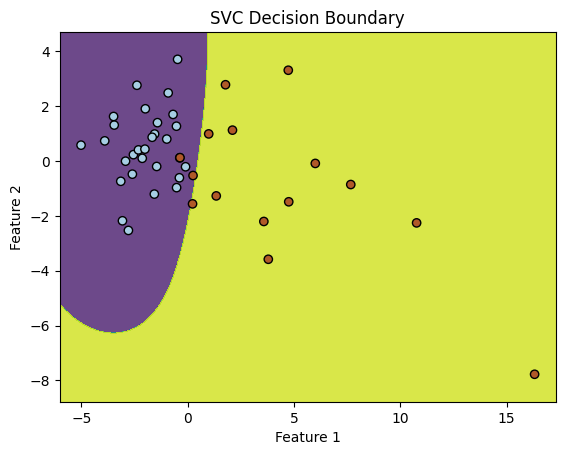

In [82]:
""" Plot the decision boundary taking only two features. In this case the first two columns.
The 'plot_decision_boundary' is two-dimensional visualizer.
"""
clf2.fit(X_train2.iloc[:, :2], y_train2)
plot_decision_boundary(clf2, X_train2.iloc[:, :2], y_train2)